# Ames Housing Notebook: 02 - Exploratory Data Analysis with Visualizations
***
## Importing baseline packages

In [877]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns
from pandas import DataFrame

%matplotlib inline

### Reading in the cleaned train csv that was prepared in the 01_Cleaning notebook

In [878]:
train_df = pd.read_csv('../datasets/train_clean.csv')

In [879]:
train_df.head()

,Unnamed: 0,id_x,pid_x,ms_subclass_x,ms_zoning,lot_area_x,street,lot_shape,land_contour,utilities,...,paved_drive_Y,sale_type_COD,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_WD
0,0,109,533352170,60,RL,13517,Pave,IR1,Lvl,AllPub,...,1,0,0,0,0,0,0,0,0,1
1,1,544,531379050,60,RL,11492,Pave,IR1,Lvl,AllPub,...,1,0,0,0,0,0,0,0,0,1
2,2,153,535304180,20,RL,7922,Pave,Reg,Lvl,AllPub,...,1,0,0,0,0,0,0,0,0,1
3,3,318,916386060,60,RL,9802,Pave,Reg,Lvl,AllPub,...,1,0,0,0,0,0,0,0,0,1
4,4,255,906425045,50,RL,14235,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,0,0,0,0,1


### Dropping the Unnamed: 0 column

In [880]:
train_df = train_df.drop(columns=['Unnamed: 0'])

In [881]:
train_df.head(2)

,id_x,pid_x,ms_subclass_x,ms_zoning,lot_area_x,street,lot_shape,land_contour,utilities,lot_config,...,paved_drive_Y,sale_type_COD,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_WD
0,109,533352170,60,RL,13517,Pave,IR1,Lvl,AllPub,CulDSac,...,1,0,0,0,0,0,0,0,0,1
1,544,531379050,60,RL,11492,Pave,IR1,Lvl,AllPub,CulDSac,...,1,0,0,0,0,0,0,0,0,1


### Our cleaned dataset has 346 columns, up from 81 columns, due to dummying the non-numeric variables
***
### Examining the data types of our columns

In [882]:
train_df.dtypes

id_x                int64
pid_x               int64
ms_subclass_x       int64
ms_zoning          object
lot_area_x          int64
                    ...  
sale_type_ConLI     int64
sale_type_ConLw     int64
sale_type_New       int64
sale_type_Oth       int64
sale_type_WD        int64
Length: 346, dtype: object

### Checking to see how columns are objects

In [883]:
(train_df.dtypes == object).sum()

37

### Looking for anomolies in the describe method of train_df

In [884]:
train_df.describe()

,id_x,pid_x,ms_subclass_x,lot_area_x,overall_qual_x,overall_cond_x,year_built_x,year_remod/add_x,mas_vnr_area_x,bsmtfin_sf_1_x,...,paved_drive_Y,sale_type_COD,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_WD
count,2049.000000,2.049000e+03,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,...,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.00000,2049.000000,2049.000000,2049.000000
mean,1473.676428,7.134001e+08,57.025378,10024.677892,6.108346,5.562714,1971.673499,1984.166423,97.736945,437.984383,...,0.907272,0.030747,0.004880,0.001952,0.008297,0.003416,0.00244,0.077111,0.001952,0.869204
std,844.248064,1.886859e+08,42.837269,6608.511749,1.421780,1.104897,30.171293,21.032785,171.936400,439.738933,...,0.290122,0.172673,0.069706,0.044151,0.090730,0.058363,0.04935,0.266832,0.044151,0.337259
min,1.000000,5.263011e+08,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,753.000000,5.284581e+08,20.000000,7500.000000,5.000000,5.000000,1953.000000,1964.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000
50%,1481.000000,5.354532e+08,50.000000,9405.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,368.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000
75%,2199.000000,9.071760e+08,70.000000,11500.000000,7.000000,6.000000,2001.000000,2004.000000,158.000000,733.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000
max,2930.000000,9.241520e+08,190.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,2188.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


### Let's start by looking specifically at the year_built column.  Assessing value counts

In [885]:
train_df['year_built_x'].value_counts()

2005    102
2006     99
2007     78
2004     72
2003     64
       ... 
1911      1
1893      1
1885      1
1879      1
1872      1
Name: year_built_x, Length: 113, dtype: int64

#### Creating a horizontal bar plot of ms_subclass value counts. To do, I need to select the column, convert it into a pandas dataframe, create a list of the full names of each subclass and append the list to the dataframe.  From there the figure can be created.

In [886]:
ms = train_df['ms_subclass_x'].value_counts()

In [887]:
ms_sub = pd.DataFrame(ms)

In [888]:
ms_list = ['1-STORY 1946 & NEWER ALL STYLES', '2-STORY 1946 & NEWER', '1-1/2 STORY FINISHED ALL AGES', 
           '1-STORY PUD (Planned Unit Development) - 1946 & NEWER', '1-STORY 1945 & OLDER',
           '2-STORY 1945 & OLDER', '2-STORY PUD - 1946 & NEWER', 'SPLIT OR MULTI-LEVEL', 
           'DUPLEX - ALL STYLES AND AGES', '2 FAMILY CONVERSION - ALL STYLES AND AGES', 'SPLIT FOYER', 
           '2-1/2 STORY ALL AGES', '1-1/2 STORY - UNFINISHED ALL AGES', 'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
           '1-STORY W/FINISHED ATTIC ALL AGES', '1-1/2 STORY PUD - ALL AGES']

In [889]:
ms_sub['subclass_name'] = ms_list

In [890]:
ms_sub = ms_sub.rename(columns = {"ms_subclass_x":"value_count"})

In [891]:
ms_sub

,value_count,subclass_name
20,769,1-STORY 1946 & NEWER ALL STYLES
60,393,2-STORY 1946 & NEWER
50,198,1-1/2 STORY FINISHED ALL AGES
120,132,1-STORY PUD (Planned Unit Development) - 1946 ...
30,101,1-STORY 1945 & OLDER
70,90,2-STORY 1945 & OLDER
160,88,2-STORY PUD - 1946 & NEWER
80,86,SPLIT OR MULTI-LEVEL
90,75,DUPLEX - ALL STYLES AND AGES
190,46,2 FAMILY CONVERSION - ALL STYLES AND AGES


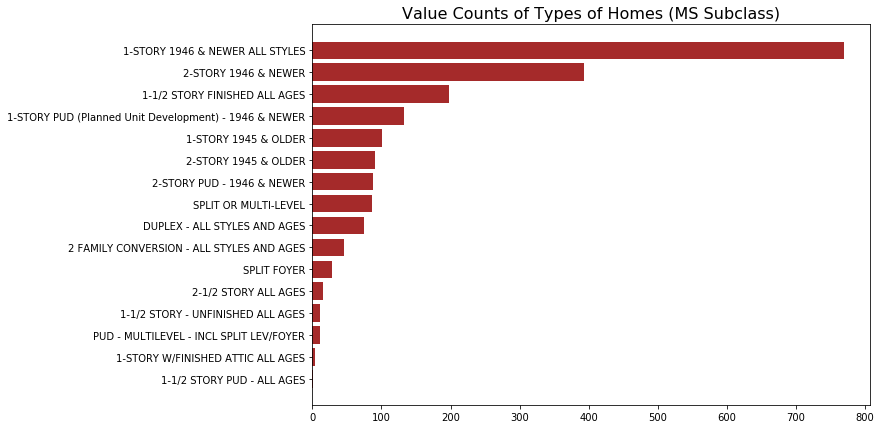

In [892]:
plt.figure(figsize=(10, 7))
plt.barh(ms_list, ms, color='brown')
plt.gca().invert_yaxis()
plt.title('Value Counts of Types of Homes (MS Subclass)', fontsize=16);

### Doing the same type of value counts subplot for 'house_style' for comparison

In [893]:
hs = train_df['house_style'].value_counts()

In [894]:
hs

1Story    1058
2Story     597
1.5Fin     218
SLvl        94
SFoyer      50
2.5Unf      14
1.5Unf      12
2.5Fin       6
Name: house_style, dtype: int64

In [895]:
hsf = pd.DataFrame(hs)

In [896]:
hsf.insert(1, 'value_counts',[1059, 598, 218, 94, 50, 14, 12, 6], True)

In [897]:
hsf.insert(1, 'style_of_house',['1 story', '1.5 story: 2nd level finished', '1.5 story: 2nd level unfinished', '2 story',
'2.5 story: 2nd level finished', '2.5 story: 2nd level unfinished', 'Split Foyer', 'Split Level'], True)

In [898]:
hsf = hsf.drop(columns=['house_style'])
hsf = hsf.rename(columns = {'style_of_house':'house_style'})

In [899]:
hsf = hsf.reset_index()

In [900]:
hsf = hsf.drop(columns=['index'])

In [901]:
hsf

,house_style,value_counts
0,1 story,1059
1,1.5 story: 2nd level finished,598
2,1.5 story: 2nd level unfinished,218
3,2 story,94
4,2.5 story: 2nd level finished,50
5,2.5 story: 2nd level unfinished,14
6,Split Foyer,12
7,Split Level,6


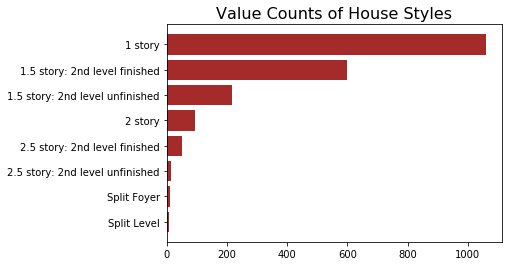

In [902]:
plt.figure(figsize=(6,4))
plt.barh(hsf['house_style'], hsf['value_counts'], color='brown')
plt.gca().invert_yaxis()
plt.title('Value Counts of House Styles', fontsize=16);

### The majority of the homes in Ames are 1-story and were built after 1945.  The remainder of the majority is made up by 1 ½ story and 2 story homes.
***
### Creating an overlapping bar chart of value counts of bedrooms and bathrooms

In [903]:
bed = train_df['bedroom_abvgr_x'].value_counts()

In [904]:
bed

3    1107
2     543
4     265
1      75
5      41
6      12
0       5
8       1
Name: bedroom_abvgr_x, dtype: int64

In [905]:
bed = pd.DataFrame(bed)

In [906]:
bed

,bedroom_abvgr_x
3,1107
2,543
4,265
1,75
5,41
6,12
0,5
8,1


In [907]:
bed = bed.rename(columns= {'bedroom_abvgr_x':'value_counts'})

In [908]:
bed.index.name= 'bedrooms'

In [909]:
bed

,value_counts
bedrooms,
3,1107
2,543
4,265
1,75
5,41
6,12
0,5
8,1


In [910]:
bed = bed.reset_index()

In [911]:
bath = train_df['full_bath_x'].value_counts()

In [912]:
bath = pd.DataFrame(bath)

In [913]:
bath

,full_bath_x
2,1094
1,900
3,45
0,8
4,2


In [914]:
bath = bath.rename(columns= {'full_bath_x':'value_counts'})

In [915]:
bath

,value_counts
2,1094
1,900
3,45
0,8
4,2


In [916]:
bath.index.name= 'bathrooms'

In [917]:
bath = bath.reset_index()

In [918]:
bath

,bathrooms,value_counts
0,2,1094
1,1,900
2,3,45
3,0,8
4,4,2


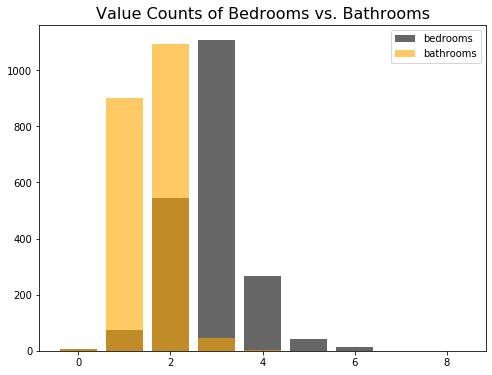

In [922]:
plt.figure(figsize=(8,6))
ax = plt.axes()
plt.bar(bed['bedrooms'], bed['value_counts'], color='black', alpha=0.6)
plt.bar(bath['bathrooms'], bath['value_counts'], color= 'orange', alpha=0.6)
plt.title('Value Counts of Bedrooms vs. Bathrooms', fontsize=16);
ax.legend(['bedrooms', 'bathrooms'])

### Most homes are 2 - 3 bedrooms, with 3 bedrooms being the vast majority.  And those homes generally have 1-2 bathrooms.
***
### Creating a neighborhood value counts horizontal bar plot

In [590]:
train_df['neighborhood'].value_counts()

NAmes      310
CollgCr    180
OldTown    163
Edwards    141
Somerst    130
NridgHt    122
Gilbert    116
Sawyer     111
SawyerW     87
NWAmes      87
Mitchel     82
BrkSide     76
Crawfor     71
IDOTRR      69
NoRidge     48
Timber      48
StoneBr     38
SWISU       32
ClearCr     27
MeadowV     24
Blmngtn     22
BrDale      19
NPkVill     17
Veenker     17
Blueste      6
Greens       3
GrnHill      2
Landmrk      1
Name: neighborhood, dtype: int64

In [591]:
nhd_pd = pd.DataFrame(nhd)

In [592]:
names_full = ['North Ames', 'College Creek', 'Old Town', 'Edwards', 'Somerset', 'Northridge Heights',
        'Gilbert', 'Sawyer', 'Sawyer West', 'Northwest Ames', 'Mitchell', 'Brookside', 'Crawford', 
        'Iowa DOT and Rail Road', 'Northridge', 'Timberland', 'Stone Brook', 'S. & W. of Iowa State Univ.', 
        'Clear Creek', 'Meadow Village', 'Bloomington Heights', 'Briardale', 'Northpark Villa',
        'Veenker', 'Bluestem', 'Greens', 'Green Hills', 'Landmark']

In [593]:
nhd_pd['neighborhood'] = names_full

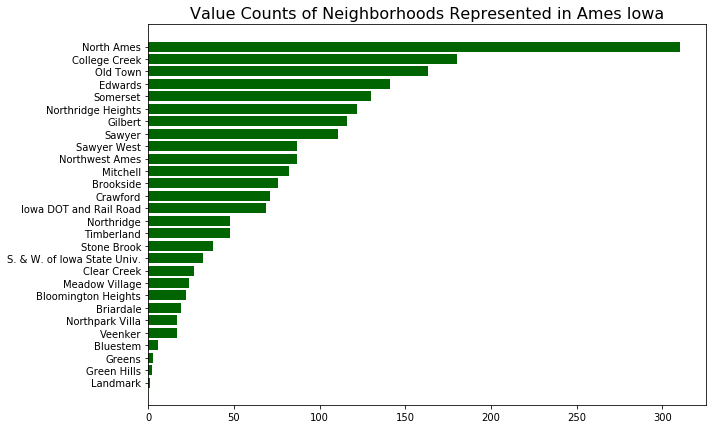

In [594]:
plt.figure(figsize=(10, 7))
plt.barh(names_full, train_df['neighborhood'].value_counts(), color='darkgreen')
plt.gca().invert_yaxis()
plt.title('Value Counts of Neighborhoods Represented in Ames Iowa', fontsize=16);

#### The neighborhoods in Ames vary in size, upscaleness, and desirability.
***

### Creating a categorical scatter plot of Neighborhood vs. Sale Price with Hue of House Style

Text(0, 0.5, 'Sale Price')

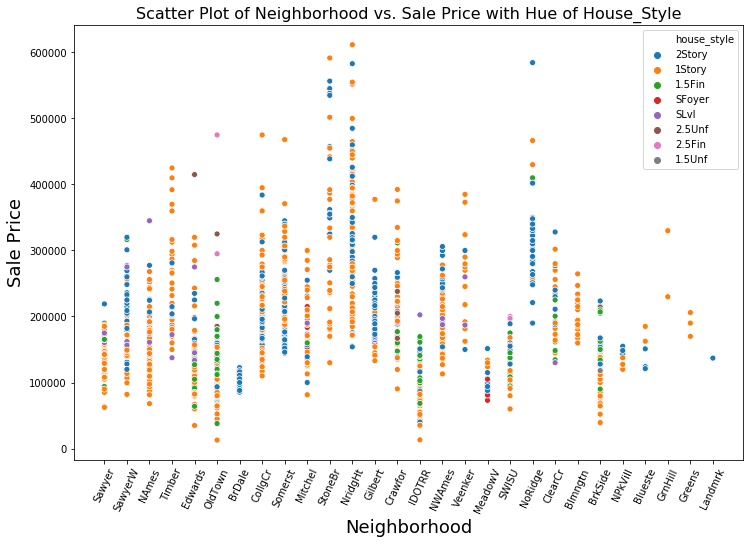

In [595]:
plt.figure(figsize = (12,8))
plt.xticks(rotation=65)
plt.title('Scatter Plot of Neighborhood vs. Sale Price with Hue of House_Style', fontsize=16)
sns.scatterplot(x=train_df['neighborhood'], y=train_df['saleprice_y'], 
                hue=train_df['house_style'], data=train_df)
plt.xlabel('Neighborhood', fontsize=18)
plt.ylabel('Sale Price', fontsize=18)

### The orange and blue dots, which represent 1 and 2 story homes make up the majority.   The most expensive home as it turns it is 1 story.
***
### Creating a Boxplot using the same variables to get a different angle on neighborhood vs. sale price, to note, the colors of this next plot have no meaning.

Text(0, 0.5, 'Sale Price')

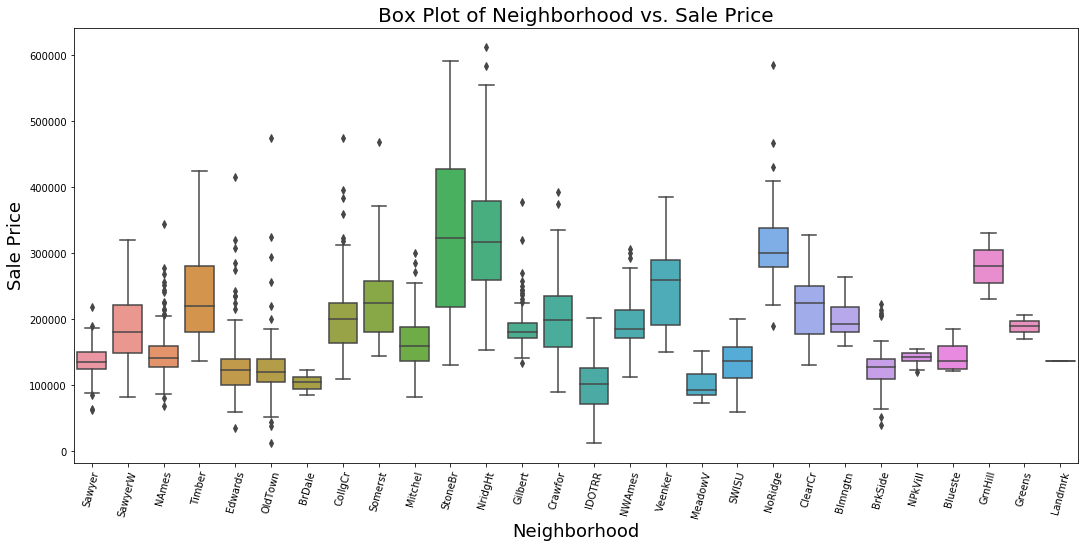

In [596]:
plt.figure(figsize = (18,8))
plt.xticks(rotation=75)
plt.title('Box Plot of Neighborhood vs. Sale Price', fontsize=20)
sns.boxplot(x=train_df['neighborhood'], y=train_df['saleprice_y'], data=train_df)
plt.xlabel('Neighborhood', fontsize=18)
plt.ylabel('Sale Price', fontsize=18)

#### Here we can better appreciate the distribution of prices for homes in each neighborhood.  We can see how the median prices and standard deviations vary tremendously from neighborhood to neighborhood, something that our predictive model ideally takes into account.
***
### Next is a boxplot of MS Subclass vs. sale price

Text(0, 0.5, 'Sale Price')

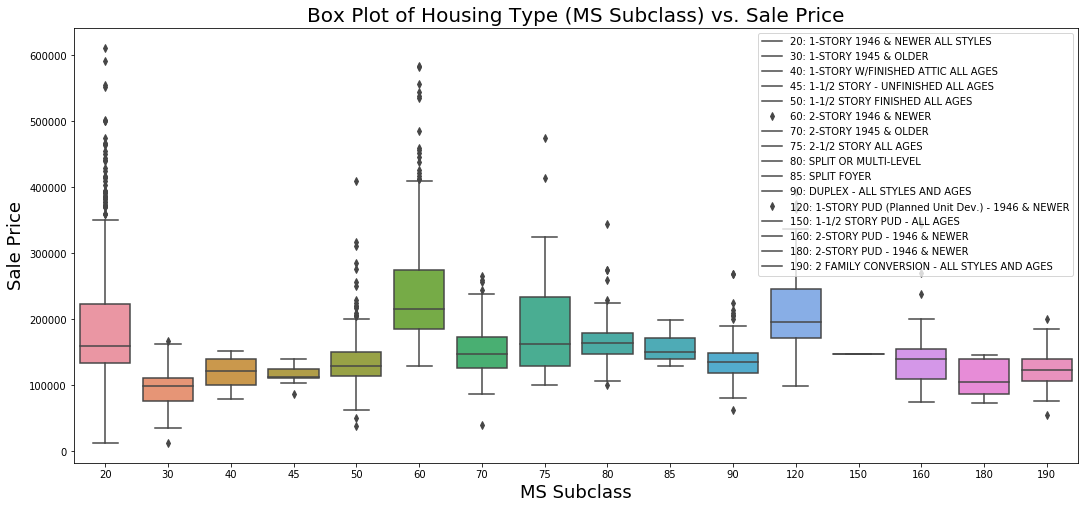

In [597]:
fig = plt.figure(figsize = (18,8))
ax= plt.axes()
plt.title('Box Plot of Housing Type (MS Subclass) vs. Sale Price', fontsize=20)
sns.boxplot(x=train_df['ms_subclass_x'], y=train_df['saleprice_y'], data=train_df)
ax.legend(['20: 1-STORY 1946 & NEWER ALL STYLES','30: 1-STORY 1945 & OLDER',
'40: 1-STORY W/FINISHED ATTIC ALL AGES','45: 1-1/2 STORY - UNFINISHED ALL AGES',
'50: 1-1/2 STORY FINISHED ALL AGES','60: 2-STORY 1946 & NEWER','70: 2-STORY 1945 & OLDER',
'75: 2-1/2 STORY ALL AGES', '80: SPLIT OR MULTI-LEVEL', '85: SPLIT FOYER', '90: DUPLEX - ALL STYLES AND AGES',
'120: 1-STORY PUD (Planned Unit Dev.) - 1946 & NEWER', '150: 1-1/2 STORY PUD - ALL AGES',
'160: 2-STORY PUD - 1946 & NEWER', '180: 2-STORY PUD - 1946 & NEWER', '190: 2 FAMILY CONVERSION - ALL STYLES AND AGES'])
plt.xlabel('MS Subclass', fontsize=18)
plt.ylabel('Sale Price', fontsize=18)

### We can see from this plot that the homes with the highest median sale price are:  1-story 1946 & Newer all styles, 2 story 1946 & Newer, 1-story Planed Unit Development 1946 & Newer.
***
### Creating a Scatter Plot to evaluate Overall Quality vs. Sale Price with hue of Eternal Quality

Text(0, 0.5, 'Sale Price')

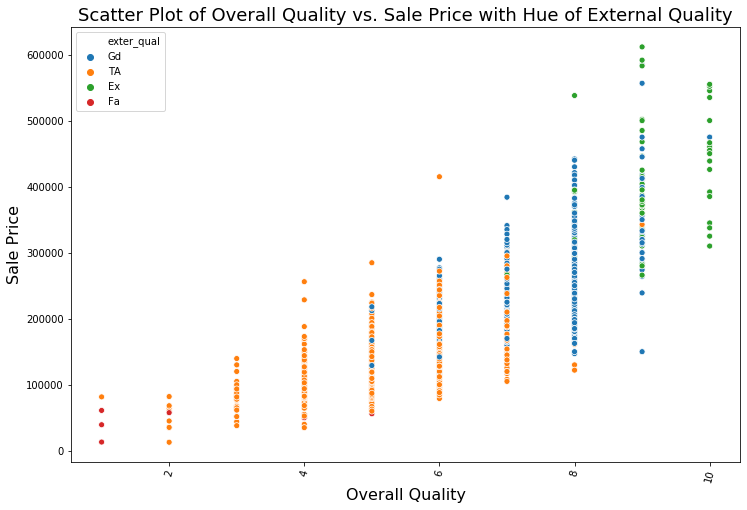

In [598]:
plt.figure(figsize = (12,8))
plt.xticks(rotation=75)
plt.title('Scatter Plot of Overall Quality vs. Sale Price with Hue of External Quality', fontsize=18)
sns.scatterplot(x=train_df['overall_qual_x'], y=train_df['saleprice_y'], 
                hue=train_df['exter_qual'], data=train_df)
plt.xlabel('Overall Quality', fontsize=16)
plt.ylabel('Sale Price', fontsize=16)

#### The Blue and Green dots, which represent Good and Excellent External Quality are grouped mostly to the right in the ranges of the highest Overall Quality.  If a house looks good, then it is good, which means it is worth more.  
***
### Creating a scatter plot of Year Built vs. Sale Price, hue of Overall Condition

Text(0, 0.5, 'Sale Price')

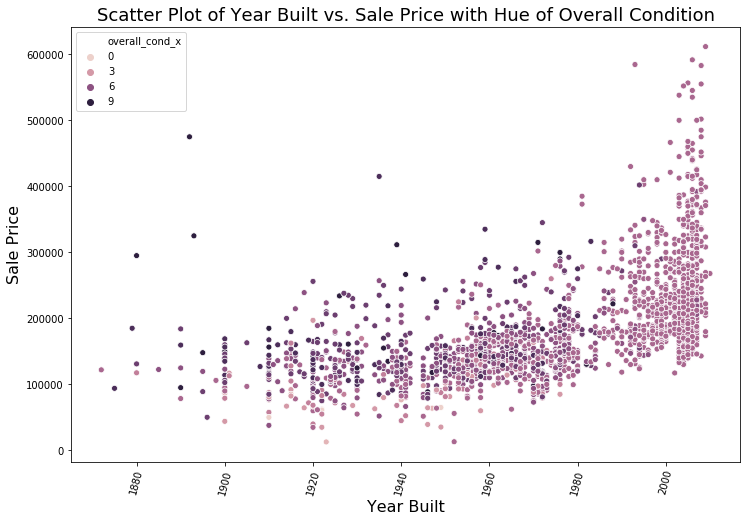

In [599]:
plt.figure(figsize = (12,8))
plt.xticks(rotation=75)
plt.title('Scatter Plot of Year Built vs. Sale Price with Hue of Overall Condition', fontsize=18)
sns.scatterplot(x=train_df['year_built_x'], y=train_df['saleprice_y'], 
                hue=train_df['overall_cond_x'], data=train_df)
plt.xlabel('Year Built', fontsize=16)
plt.ylabel('Sale Price', fontsize=16)

### Fascinating, the darker dots, which represent better overall condition are distributed mostly in homes built before 1980.
***
### Creating a comparison plot with x= Overall Quality

Text(0, 0.5, 'Sale Price')

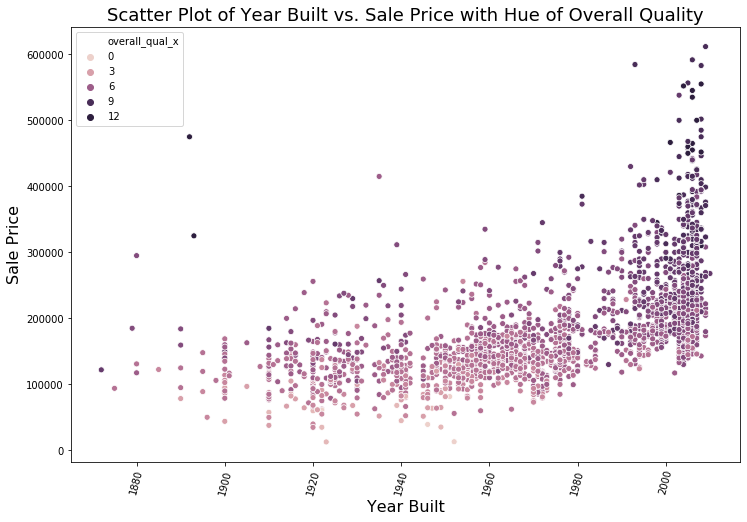

In [600]:
plt.figure(figsize = (12,8))
plt.xticks(rotation=75)
plt.title('Scatter Plot of Year Built vs. Sale Price with Hue of Overall Quality', fontsize=18)
sns.scatterplot(x=train_df['year_built_x'], y=train_df['saleprice_y'], 
                hue=train_df['overall_qual_x'], data=train_df)
plt.xlabel('Year Built', fontsize=16)
plt.ylabel('Sale Price', fontsize=16)

### Notice that the homes with the highest Overall Quality (the darker dots) were built mostly after 1980.  This is in sharp contrast to the last plot in which homes buily after 1980 had lower ratings of Overall Condition. 

Older homes are constructed of materials that last longer.  Hence better overall condition.  Whereas, new homes are built with materials that look nicer.  Hence, better overall quality.  

Investors would do well to buy older homes and remodel them with better quality materials, thus they will have the best of both worlds: high overall condition (the bones of the house) and high overall quality (the external materials or the appearance of the house), giving it the highest sale price
***
### Creating a Swarm plot of house style vs. Sale Price, hue of Garage Size (cars)

Text(0, 0.5, 'Sale Price')

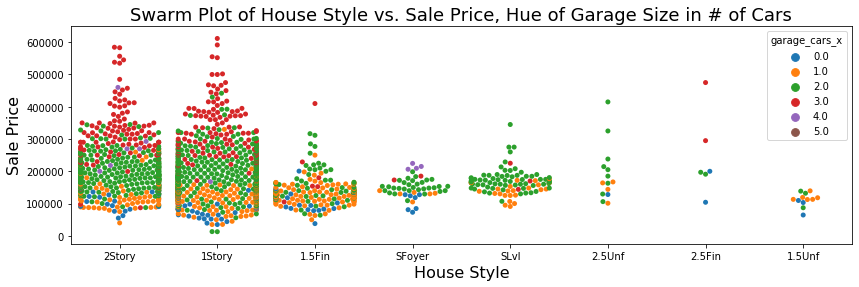

In [601]:
plt.figure(figsize = (14,4))
plt.xticks(rotation=0)
plt.title('Swarm Plot of House Style vs. Sale Price, Hue of Garage Size in # of Cars', fontsize=18)
sns.swarmplot(x=train_df['house_style'], y=train_df['saleprice_y'], 
                hue=train_df['garage_cars_x'], data=train_df)
plt.xlabel('House Style', fontsize=16)
plt.ylabel('Sale Price', fontsize=16)

### In this plot we can clearly see the strata formed by the hue of the # of cars a garage can fit across each style of home
***
### Lastly is a similar swarm plot as the previous one except that the hue is full bathrooms.

Text(0, 0.5, 'Sale Price')

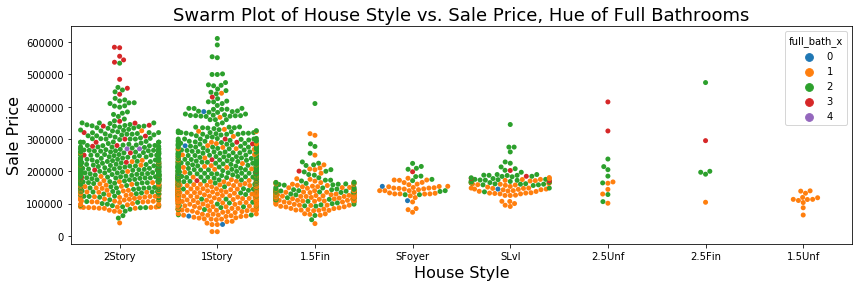

In [602]:
plt.figure(figsize = (14,4))
plt.xticks(rotation=0)
plt.title('Swarm Plot of House Style vs. Sale Price, Hue of Full Bathrooms', fontsize=18)
sns.swarmplot(x=train_df['house_style'], y=train_df['saleprice_y'], 
                hue=train_df['full_bath_x'], data=train_df)
plt.xlabel('House Style', fontsize=16)
plt.ylabel('Sale Price', fontsize=16)

### We can see here that most of the homes have 1-2 bathrooms with clear strata around \$200,000 between 1 and 2 full bathroom homes.